# PORTFOLIO

In [54]:
# plotting parameters
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

In [121]:
np.random.random(5)

array([0.51964065, 0.07917777, 0.15065625, 0.54607781, 0.38582567])

In [37]:
pkobp_data = feature_engineering.preprocessing.get_data_by_ticker('PKO.WA', datetime.datetime(2016, 1, 1), datetime.datetime(2020, 12, 31), ['Close'])
pekao_data = feature_engineering.preprocessing.get_data_by_ticker('PEO.WA', datetime.datetime(2016, 1, 1), datetime.datetime(2020, 12, 31), ['Close'])
santander_data = feature_engineering.preprocessing.get_data_by_ticker('SPL.WA', datetime.datetime(2016, 1, 1), datetime.datetime(2020, 12, 31), ['Close'])
ing_data = feature_engineering.preprocessing.get_data_by_ticker('ING.WA', datetime.datetime(2016, 1, 1), datetime.datetime(2020, 12, 31), ['Close'])
mbank_data = feature_engineering.preprocessing.get_data_by_ticker('MBK.WA', datetime.datetime(2016, 1, 1), datetime.datetime(2020, 12, 31), ['Close'])

In [38]:
pkobp_data = pkobp_data.rename(columns={"Close": "pkobp"})
pekao_data = pekao_data.rename(columns={"Close": "pekao"})
santander_data = santander_data.rename(columns={"Close": "santander"})
ing_data = ing_data.rename(columns={"Close": "ing"})
mbank_data = mbank_data.rename(columns={"Close": "mbank"})

In [49]:
#list of stocks in portfolio
data = pd.concat([pkobp_data, pekao_data, santander_data, ing_data, mbank_data], axis=1)
stocks = list(data.columns)
data.sort_index(inplace=True)
#convert daily stock prices into daily returns
returns = data.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
#set array holding portfolio weights of each stock
weights = np.asarray([0.4246668738, 0.2523178532, 0.1640979736, 0.08434712837, 0.074570171])
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print(f'Portfolio expected annualised return is {portfolio_return} and volatility is {portfolio_std_dev}')

Portfolio expected annualised return is 0.03 and volatility is 0.27


C:\Users\user\AppData\Local\Temp\ipykernel_13856\4095946231.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=700)
C:\Users\user\AppData\Local\Temp\ipykernel_13856\4095946231.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=700)


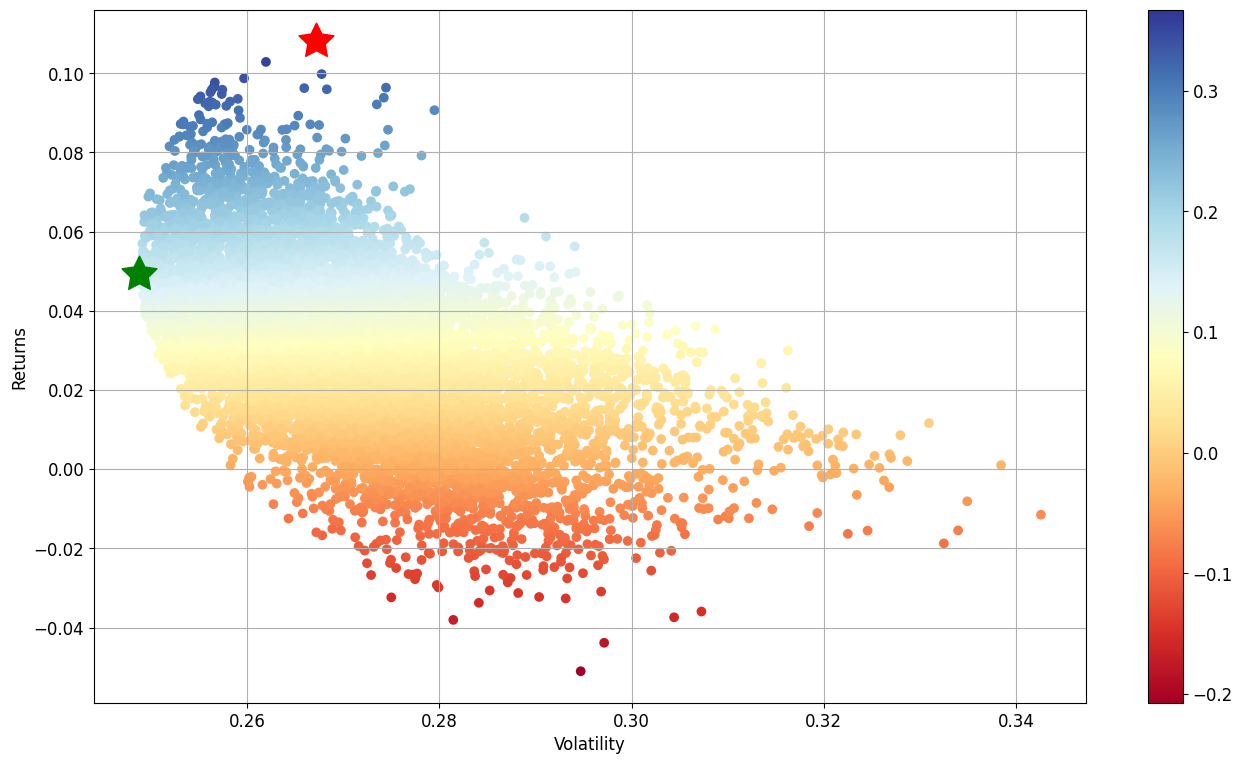

In [125]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#convert daily stock prices into daily returns
returns = data.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
#set number of runs of random portfolio weights
num_portfolios = 10000


results = np.zeros((4+5-1,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 250
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(250)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = (results[0,i] - 0.01) / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3], stocks[4]])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=700)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=700)